In [1]:
!pip install -U nltk

Requirement already up-to-date: nltk in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (3.4.5)


In [122]:
%%bash 
conda install -c anaconda nltk=3.2.1
- y


Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda


bash: line 2: y: command not found


<div class="alert alert-block alert-info"><h2 style="font-size:30px"style="padding:1px"><center>Gutenberg Challenge - Notebook Submission </center></h2><center><h4>Challenge - Part I:</h4></center> 
<p>Using any combination of Scala, Python, and Spark, find the answers to the following questions given the books in gutenberg.zip
<p>In which books does the word “truth” appear more than twice?
<p>What is the average release date? The year the book was released on project Gutenberg.
<p>What is the most common release date?
<p>What is the ratio of English books to non English books?
<p>Which book has the most dialogue between characters?
<p>Which book is the longest?</div>  
<div class="alert alert-block alert-warning"><h5> Run the first cell to load the necessary:</h5>
       <p>Modules;
       <p>Dependencies and 
       <p>Data. 

In [5]:
import os
import sys
import re

import glob

import numpy as np
import pandas as pd
import sklearn

from nltk import *
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from __future__ import unicode_literals
from six import string_types
from nltk import *
from nltk import compat
from nltk.corpus.reader.util import *
from nltk.corpus.reader.api import *
from nltk.corpus.reader.xmldocs import *
from nltk.corpus import PlaintextCorpusReader

SyntaxError: import * only allowed at module level (<ipython-input-5-a51aa10878a2>, line 2)

<html>
<head><meta name="viewport" content=width="100", initial-scale="4">
<style>
* {
  box-sizing: border-box;
}
/* Create two equal columns that floats next to each other */
.column {
  float: left;
  width: 20%;
  padding: 10px;
  height: 10px; /* Should be removed. Only for demonstration */
}
/* Clear floats after the columns */
.row{
  content: "";
  display: table;
  clear: both;
}
</style></head>
<body><div class="row">
  <div class="column" style="background-color:#f2f2f2"><br>
   <div><h1><center>ETL</center></h1>
      <hp><center>Extract - Transform - Load</center><hp>
  <div class="column" style="background-color:#f2f2f2">
<div class="alert alert-block alert-info">
<h4> </h4>
    <img src="ETL.png" width="500" height="350"></div>
  <div>
</div>
</body>
</html>

In [7]:
# Simple read.  Checking the first file.
import glob
file = '11-0.txt' 

gutLs=[]

myfile = open(file,'rt')
for line in myfile:
    gutLs.append(line)
    print(line)

FileNotFoundError: [Errno 2] No such file or directory: '11-0.txt'

<div class="alert alert-block alert-info">
<tr>
<h3><strong>1. Analyze data.</strong></h3>
Survey the data and study it before any further any steps to learn about it and make informed decisions. This step needs to occur after the data is made available and before any further ETL step. This is a simple study of the data, getting to know the data to further design the necessary steps taking into consideration the desired outcomes.<br>
    <tr>
<h5><strong>Results from this data analysis:</strong></h5>
Source: gutenberg folder – provided with the challenge in homogeneous format, all files were .txt.<br>
The directory provided contained: 761 files.<br>
File type: text.<br>
Text encoding: utf-8<br>
Languages: Multiple languages.<br>

<h5><strong>Issues found at first:<strong></h5>
Each file contains a standardized Header and Footer that needs to be cleaned out from the file.<br>
Multiple languages.<br>
Different cases, data contains lower and upper case.
<br>
<div class="alert alert-block alert-warning">
<strong><center><h3> Define desired metadata according to provided data and desired outcomes:</h3></center></strong>
<tr>
Metadata Necessary:<br>
Title: String <br>
Author: Name (First Name + Last Name)	<br>
Posting Date: Month Day, Year {EBook #number]<br>
Release Date: Month, Year<br>
Last Updated: Month, Year<br>
Language: Multiple<br>
Character set encoding: UTF - 8<br>
 </tr>
</table>

In [17]:
import re
import glob
import os

keywords = ['Title:', 'Author:', 'Release Date:', 'Language:'] # etc - you probably get those from some source
pattern = re.compile('|'.join(keywords))

for line in gutLs:
    if pattern.search(line):
        print(line)

Title: Alice’s Adventures in Wonderland

Author: Lewis Carroll

Release Date: March, 1994

Language: English



In [18]:
import glob
import os
import pandas as pd
import re

#path = 
#fids = glob.glob(os.path.join(path, '*.txt')) # All txt files in folder

files = ['11-0.txt','12-0.txt','13-0.txt'] 

dfList =[]
for fid in files:
    f = open(fid, 'rt')
    text = f.read()
    for fname in files:
        if fid in fname:
            df = pd.read_csv(fname, sep='\t', header=None)
            df.columns = [fname]
            fdf = pd.concat([df, df], axis=1)
            dfList.append(fdf)
            fdf.head(5) # First n rows of the DataFrame
            #fdf.tail(5) # Last n rows of the DataFrame
            #fdf.shape # Number of rows and columns
            fdf.info() # Index, Datatype and Memory information
            fdf.describe() # Summary statistics for numerical columns
                    #finaldf = pd.concat(dfList)
                    #print(fdf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2791 entries, 0 to 2790
Data columns (total 2 columns):
11-0.txt    2791 non-null object
11-0.txt    2791 non-null object
dtypes: object(2)
memory usage: 43.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 2 columns):
12-0.txt    3173 non-null object
12-0.txt    3173 non-null object
dtypes: object(2)
memory usage: 49.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 2 columns):
13-0.txt    948 non-null object
13-0.txt    948 non-null object
dtypes: object(2)
memory usage: 14.9+ KB


In [27]:
# Get lines containing the desired metadata.
keywords = ['Title:', 'Author:', 'Release Date:', 'Language:'] # etc - you probably get those from some source
pattern = re.compile('|'.join(keywords))


meta=[]

for file in files:
    f = open(file, 'rt')
    for line in f:
        if pattern.search(line):
            meta.append(line)
            meta

            li = []
            for filename in files:
                #df = pd.read_csv(filename, index_col=None, header=0)
                li.append(df)
                frame = pd.concat(li, axis=0, ignore_index=True)
                print(frame)


                                              13-0.txt
0    The Project Gutenberg EBook of The Hunting of ...
1    This eBook is for the use of anyone anywhere a...
2    almost no restrictions whatsoever.  You may co...
3    re-use it under the terms of the Project Guten...
4       with this eBook or online at www.gutenberg.org
5                      Title: The Hunting of the Snark
6                               An Agony in Eight Fits
7                                Author: Lewis Carroll
8              Posting Date: June 25, 2008 [EBook #13]
9                          Release Date: March 8, 1992
10                       Last Updated: October 6, 2016
11                                   Language: English
12                       Character set encoding: UTF-8
13   *** START OF THIS PROJECT GUTENBERG EBOOK THE ...
14                            THE HUNTING OF THE SNARK
15                                       Lewis Carroll
16                  THE MILLENNIUM FULCRUM EDITION 1.2
17        

In [20]:
import glob
import os
import pandas as pd

#path = '11-0.txt' 
#fids = glob.glob(os.path.join(path, '*.txt')) # All txt files in folder
files = ['11-0.txt','12-0.txt','13-0.txt'] 

for fid in files:
    f = open(fid, 'rt')
    text = f.read()
    for fname in files:
        if fid in fname:
            df = pd.read_csv(fname, sep='\t', header=None)
            df.columns = [fname]
            fdf = pd.concat([df, df], axis=1)
            dfList.append(fdf)
            fdf.head(5) # First n rows of the DataFrame
            fdf.tail(5) # Last n rows of the DataFrame
            fdf.shape # Number of rows and columns
            fdf.info() # Index, Datatype and Memory information
            fdf.describe() # Summary statistics for numerical columns
                    #finaldf = pd.concat(dfList)
            print(fdf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2791 entries, 0 to 2790
Data columns (total 2 columns):
11-0.txt    2791 non-null object
11-0.txt    2791 non-null object
dtypes: object(2)
memory usage: 43.7+ KB
                                               11-0.txt  \
0     Project Gutenberg’s Alice’s Adventures in Wond...   
1     This eBook is for the use of anyone anywhere a...   
2     almost no restrictions whatsoever.  You may co...   
3     re-use it under the terms of the Project Guten...   
4        with this eBook or online at www.gutenberg.org   
5               Title: Alice’s Adventures in Wonderland   
6                                 Author: Lewis Carroll   
7               Posting Date: June 25, 2008 [EBook #11]   
8                             Release Date: March, 1994   
9                         Last Updated: October 6, 2016   
10                                    Language: English   
11                        Character set encoding: UTF-8   
12    *** START OF T

In [21]:
files = ['11-0.txt','12-0.txt','13-0.txt'] 
#fids = glob.glob(os.path.join(path, '*.txt'))

name = []
for file in files:
    name.append(file)
    print(name)

['11-0.txt']
['11-0.txt', '12-0.txt']
['11-0.txt', '12-0.txt', '13-0.txt']


<div class="alert alert-block alert-warning">
Tokenization and Cleaning with NLTK
The Natural Language Toolkit, or NLTK for short, Python library written for working and modeling text.

It provides good tools for loading and cleaning text that we can use to get our data ready for working with machine learning and deep learning algorithms.


A small pipeline of text preparation including:

Load the raw text.
Split into tokens.
Convert to lowercase.
Remove punctuation from each token.
Filter out remaining tokens that are not alphabetic.
Filter out tokens that are stop words.
</div>

<div class="alert alert-block alert-info">
<h2 style="font-size:25px"style="padding:5px">
Natural Language Processing </h2>
<p> The following section makes use of NLTK.</div>

In [8]:
for file in files:
    f = open(file, 'rt')
    text = f.read()
    if file in files:
        df = pd.read_csv(file, sep='\t', header=None)
        df.columns = [file]
        fdf = pd.concat([df, df], axis=1)
        dfList.append(fdf)
        fdf.head(5) # First rows of the DataFrame
        #fdf.tail(5) # Last rows of the DataFrame
        #fdf.shape # Number of rows and columns
        print(fdf)
        fdf.info() # Index, Datatype and Memory information
        fdf.describe() # Summary statistics for numerical columns
                    #finaldf = pd.concat(dfList)
                    #print(fdf)  

NameError: name 'files' is not defined

In [23]:
import re
import glob
from nltk import *
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#Text Normalization.

def text_normalization(file):
    for file in files:
        file = open(file, 'rt')
        text = file.read()
        text_string = text.split()

        punctuation_re = re.compile('[%s]' % re.escape(string.punctuation))
        number_re = re.compile('(\\d+)')

        sentences = sent_tokenize(text)
        words = text.split() ## split by whitespace
        words = re.split(r'\W+', text) # split the document into words.
        tokens = word_tokenize(text)     # split into words

        stop_words = stopwords.words('english')
        words = [word.lower() for word in words]    # Normalize to lowercase.  
        words = [word for word in tokens if word.isalpha()] # Remove all tokens that are not alphabetic
                                                            #alpha_num_re = re.compile("^[a-z0-9_.]+$")
    


<div class="alert alert-block alert-info"><h3> CREATING A CHALLENGE CORPUS</h3> 
<p>The following section makes use of NLTK.<br>
<p> A text corpus is a large body of text. 
Many corpora are designed to contain a careful balance of material in one or more genres.</p>
Display other information about each text, by looping over all the values of fileid corresponding to the gutenberg file identifiers listed earlier and then computing statistics for each text. 
For a compact output display, we will make sure that the numbers are all integers, using int(). 

In [28]:
# Unique File IDs
from __future__ import unicode_literals
from six import string_types
from nltk import *
from nltk import compat
from nltk.corpus.reader.util import *
from nltk.corpus.reader.api import *
from nltk.corpus.reader.xmldocs import *
from nltk.corpus import PlaintextCorpusReader

corpus_root = ''
challengecorpus = PlaintextCorpusReader(corpus_root, '.*')

challengecorpus.fileids()

['.ipynb_checkpoints/22_01_2020 - 16PM-checkpoint.ipynb',
 '.ipynb_checkpoints/Untitled-checkpoint.ipynb',
 '.ipynb_checkpoints/nt02-checkpoint.ipynb',
 '.ipynb_checkpoints/nt03-checkpoint.ipynb',
 '.ipynb_checkpoints/with modules per cell-checkpoint.ipynb',
 '11-0.txt',
 '12-0.txt',
 '13-0.txt',
 '16-0.txt',
 '21-0.txt',
 '22_01_2020 - 16PM.ipynb',
 'Book_Metadata.png',
 'Books_Author.png',
 'ERD01.png',
 'ETL.png',
 'Untitled.ipynb',
 'gutenberg-20200102T212323Z-001.zip',
 'nt02.ipynb',
 'nt03.ipynb',
 'with modules per cell.ipynb']

In [13]:
# This code snipped displays three statistics for each text: average word length, average sentence length, and the number 
# of times each vocabulary item appears in the text on average (our lexical diversity score).

for fileid in challengecorpus.fileids():
    num_chars = len(challengecorpus.raw(fileid)) 
    num_words = len(challengecorpus.words(fileid))
    print(fileid)
    print(num_chars)
    print(num_words)


NameError: name 'challengecorpus' is not defined

<div class="alert alert-block alert-info"> <h2 style="font-size:25px"style="padding:5px"> Challenge - Part II: </h2>
<p> The following section makes use of NLTK.
Design relational schema to house the following information:
* Information about a book, such as title, author, language, and raw text delineated by paragraph.
* Information about an author such as name, and what books they’ve written.

# ER Model

The ER Model has the power of expressing database entities in a conceptual hierarchical manner. As the hierarchy goes up, it generalizes the view of entities, and as we go deep in the hierarchy, it gives us the detail of every entity included. Going up in this structure is called Generalization Reverse is called Specialization Generalization and Specialization.Since the challenge asked for a relational schema to be designed the initial ER diagram will be used to develop a database schema. This schema should contain the types of data, their properties, their relationships and their organization, creating a clear view of the developed structure. This layout and its characteristics will in turn be used to justify the database type and the database management system chosen for this specific data and the desired outputs.

<p>The next goal was to use the available data from Gutenberg .txt books to create a database that fulfills the current requirements for data and has a build in structure that facilitates analysis and answering the proposed questions.
<p>A many to many relationaship is usually implemented as associative tables (also known as join table, junction table or cross-reference table).
<p>In a relational database management system, such relationships are usually implemented by means of an associative table (also known as join table, junction table or cross-reference table), say, AB with two one-to-many relationships A -> AB and B -> AB. In this case the logical primary key for AB is formed from the two foreign keys (i.e. copies of the primary keys of A and B).

#### ER – Diagram is often useful to to visually represent a data model. A common diagramming tool is the Entity- Relationship (ER) Diagram. 
* ER diagram consists of 3 elements:
1. Entities, 
2. Attributes and 
3. Relationships 

#### ENTITIES
An ENTITY is a real world item / concept that can exist on it’s own. It may be an object with physical existence ( person, house) or it may be an object with conceptual existence (company ,job, university course) 

*Entity Type: 
An entity type is a collection of similar entities, is also a category. An entity type is a group of objects, people, concepts or other items that have the same set of properties or attribute.
*Entity type defines collection of entities that have same attribute.
*Entity type in a database is defined by its name and attribute.
*Entity instance is a single occurrence of an entity type.

#### ATTRIBUTES
Attributes are the properties that describe the entities. It’s a property of an entity type. 
Example of Attributes: Book name, price, author, publisher, etc. are attributes of Book.

* Types of Attributes: 
*   Single-valued attribute 
*   Multi-valued attribute 
*   Null Attribute 
*   Simple Attribute 
*   Composite Attribute 
*   Key Attribute 
*   Derived Attribute 
*   Attribute Domain

#### RELATIONSHIPS
A relationship is an association of entities showing how the entities are related with each other.The relationship(s) between the entities must be defined to determine the relating field(s).  

The examples of relationship are: 
• Teaching is the relationship between Lecturer and Student. 
• Treatment is the relationship between Doctor and Patient.

Types of Relationship or Multiplicity: 
Number or range of possible occurrences of an entity type in relation to another entity type, also called Cardinality, which is the number of entity type, which is involved in a relationship. (CARDINALITY) 
1.One-to-One (1 : 1) 
2.One-to-Many (1 : N) 3. Many-to-One (N : 1) 
3.Many-to-Many (M : N)

Relating Fields & Relationships 
The MAIN relationship between the author and book entity entities.
* Many to Many Relationship.
* Possibly many X’s for each Y and many Y’s for each X.  Thus the relationship between the entities BOOK and AUTHOR can be seem as Many_to_Many (M:N). 

Models can be used to help evaluate the truth or falsity English sentences, and because of it are used as a method to represent meaning. The meaning arises from the language due to its formal and structural relationships; these relationships represent a certain degree of closeness to each other and thus define connectives.

Sentences carry meaning and associations; this is why a collection of sentences that present a certain degree of association/relationship either structurally or semantically forms a paragraph.

Arguments are used to propose these relationships and need to be logically based, which means they need to be 'syntactic valid'.

<p> A BOOK is written by one or more AUTHORS. </p>

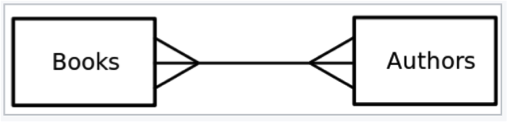

In [26]:
# M:N Relationship
from IPython.display import Image
Image(filename='Books_Author.png', width='400') 

<div class="alert alert-block alert-info"> 
A BOOK is written by one or more AUTHORS.<p> 
One AUTHOR can write one or more BOOKS.<p>

An AUTHOR can write in multiple Genres.<p>
A BOOK can be classified by more than one genre.<p>